# Demo LoFTR-DS on a single pair of images

This notebook shows how to use the loftr matcher with default config(dual-softmax) and the pretrained weights.

In [2]:
import os
os.chdir("..")
from copy import deepcopy

import torch
import cv2
import numpy as np
import matplotlib.cm as cm
from src.utils.plotting import make_matching_figure

## Indoor Example

In [15]:
from src.loftr import LoFTR, default_cfg

# The default config uses dual-softmax.
# The outdoor and indoor models share the same config.
# You can change the default values like thr and coarse_match_type.
_default_cfg = deepcopy(default_cfg)
_default_cfg['coarse']['temp_bug_fix'] = True  # set to False when using the old ckpt
matcher = LoFTR(config=_default_cfg)
matcher.load_state_dict(torch.load("weights/indoor_ds_new.ckpt")['state_dict'])
matcher = matcher.eval().cuda()

FileNotFoundError: [Errno 2] No such file or directory: 'weights/indoor_ds_new.ckpt'

In [3]:
# Load example images
img0_pth = "assets/scannet_sample_images/scene0711_00_frame-001680.jpg"
img1_pth = "assets/scannet_sample_images/scene0711_00_frame-001995.jpg"
img0_raw = cv2.imread(img0_pth, cv2.IMREAD_GRAYSCALE)
img1_raw = cv2.imread(img1_pth, cv2.IMREAD_GRAYSCALE)
img0_raw = cv2.resize(img0_raw, (640, 480))
img1_raw = cv2.resize(img1_raw, (640, 480))

img0 = torch.from_numpy(img0_raw)[None][None].cuda() / 255.
img1 = torch.from_numpy(img1_raw)[None][None].cuda() / 255.
batch = {'image0': img0, 'image1': img1}

# Inference with LoFTR and get prediction
with torch.no_grad():
    matcher(batch)
    mkpts0 = batch['mkpts0_f'].cpu().numpy()
    mkpts1 = batch['mkpts1_f'].cpu().numpy()
    mconf = batch['mconf'].cpu().numpy()

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-h4wtvo23\opencv\modules\imgproc\src\resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


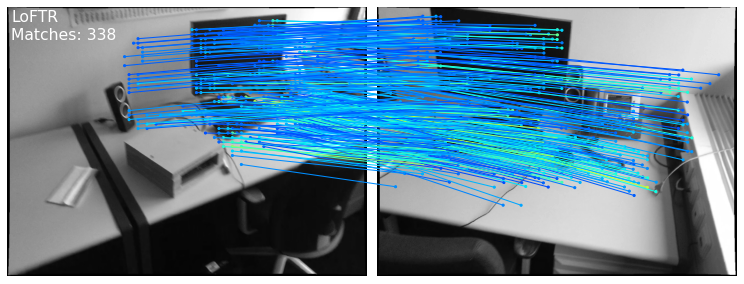

In [11]:
# Draw
color = cm.jet(mconf)
text = [
    'LoFTR',
    'Matches: {}'.format(len(mkpts0)),
]
fig = make_matching_figure(img0_raw, img1_raw, mkpts0, mkpts1, color, text=text)

## Outdoor Example

In [8]:
from src.loftr import LoFTR, default_cfg

# The default config uses dual-softmax.
# The outdoor and indoor models share the same config.
# You can change the default values like thr and coarse_match_type.
matcher = LoFTR(config=default_cfg)
# matcher.load_state_dict(torch.load("pretrained_models/outdoor_ds.ckpt")['state_dict'])
# matcher.load_state_dict(torch.load("pretrained_models/loftr-desktop.ckpt")['state_dict'])
# matcher.load_state_dict(torch.load("notebooks/tony-vfirst0-version.ckpt")['state_dict'])
# matcher.load_state_dict(torch.load("C:\\Users\\rasul\\Desktop\\LoFTR-master\\logs\\tb_logs\\outdoor-ds-640-bs=3\\version_4\\checkpoints\\enface-to-cropped-fundus-200-epochs.ckpt")['state_dict'])
matcher.load_state_dict(torch.load("C:\\Users\\rasul\\Desktop\\LoFTR-master\\pretrained_models\\10000_epoch_on_test_full_resolution.ckpt")['state_dict'])
matcher = matcher.eval().cuda()

In [5]:
default_cfg['coarse']

{'d_model': 256,
 'd_ffn': 256,
 'nhead': 8,
 'layer_names': ['self',
  'cross',
  'self',
  'cross',
  'self',
  'cross',
  'self',
  'cross'],
 'attention': 'linear',
 'temp_bug_fix': False}

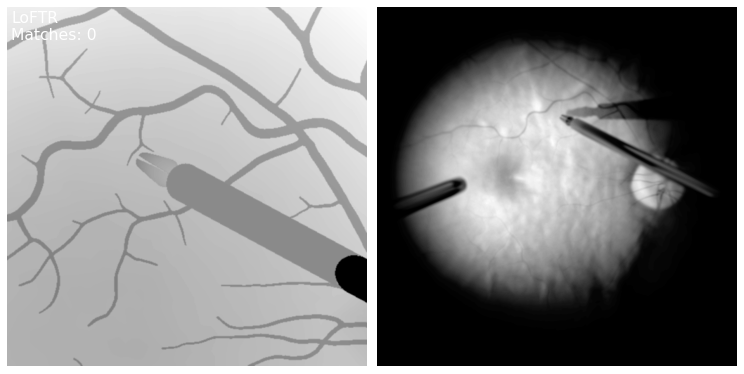

In [9]:
# Load example images
# img0_pth = "assets/phototourism_sample_images/united_states_capitol_26757027_6717084061.jpg"
# img1_pth = "assets/phototourism_sample_images/united_states_capitol_98169888_3347710852.jpg"

img0_pth = "C:\\Users\\rasul\\Desktop\\LoFTR-master\\data\\OCTsynthetic\\test\\8_enface.png"
# img0_pth = "C:\\Users\\rasul\\Desktop\\LoFTR-master\\data\\OCTsynthetic\\test\\8_DataCapture_cropped.png"
img1_pth = "C:\\Users\\rasul\\Desktop\\LoFTR-master\\data\\OCTsynthetic\\test\\8_DataCapture.png"

img0_raw = cv2.imread(img0_pth, cv2.IMREAD_GRAYSCALE)
img1_raw = cv2.imread(img1_pth, cv2.IMREAD_GRAYSCALE)

# img0_raw = cv2.resize(img0_raw, (512, 512), interpolation=cv2.INTER_LINEAR)
# img0_raw = cv2.flip(img0_raw, 0)  # Flip vertically

img0_raw = cv2.resize(img0_raw, (img0_raw.shape[1]//8*8, img0_raw.shape[0]//8*8))  # input size shuold be divisible by 8
img1_raw = cv2.resize(img1_raw, (img1_raw.shape[1]//8*8, img1_raw.shape[0]//8*8))

# scale_factor = 0.5  # Or 0.25 to reduce 2048 -> 1024 or 512
# img0_raw = cv2.resize(img0_raw, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)
# img1_raw = cv2.resize(img1_raw, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)

img0 = torch.from_numpy(img0_raw)[None][None].cuda() / 255.
img1 = torch.from_numpy(img1_raw)[None][None].cuda() / 255.
batch = {'image0': img0, 'image1': img1}

# Inference with LoFTR and get prediction
with torch.no_grad():
    matcher(batch)
    mkpts0 = batch['mkpts0_f'].cpu().numpy()
    mkpts1 = batch['mkpts1_f'].cpu().numpy()
    mconf = batch['mconf'].cpu().numpy()

# Draw
color = cm.jet(mconf)
text = [
    'LoFTR',
    'Matches: {}'.format(len(mkpts0)),
]
fig = make_matching_figure(img0_raw, img1_raw, mkpts0, mkpts1, color, text=text)

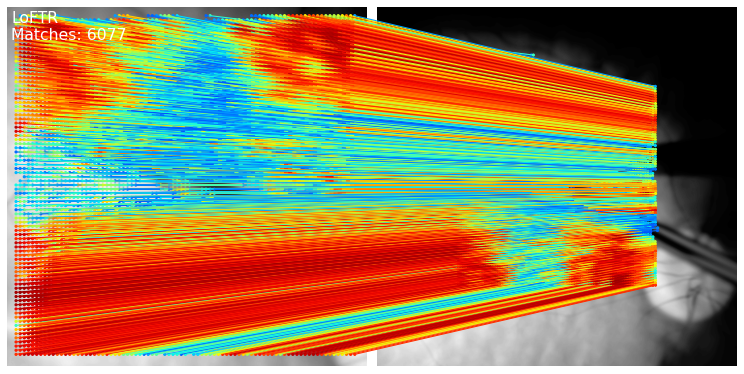

In [17]:
# Draw
color = cm.jet(mconf)
text = [
    'LoFTR',
    'Matches: {}'.format(len(mkpts0)),
]
fig = make_matching_figure(img0_raw, img1_raw, mkpts0, mkpts1, color, text=text)

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu" if torch.backends.mps.is_available() else "cpu")

def estimate_rigid_transformation(data_dict, device, conf_threshold):  
    kp1, kp2, confidences = batch['mkpts0_f'], batch['mkpts1_f'], batch['mconf']

    valid_mask = confidences > conf_threshold
    kp1, kp2 = kp1[valid_mask], kp2[valid_mask]

    kp1 = kp1.cpu().numpy()
    kp2 = kp2.cpu().numpy()

    # model_robust, inliers = ransac((kp2, kp1), EuclideanTransform, min_samples=2, residual_threshold=1, max_trials=2048, rng=233)
    # H = model_robust.params
    # H, mask = pydegensac.findHomography(kp2, kp1, 3.0)

    # Use cv2 to estimate the homography
    # H, mask = cv2.findHomography(kp2, kp1, cv2.RANSAC, 3.0)
    foundHomography, mask = cv2.findHomography(mkpts0, mkpts1, cv2.RANSAC, 3.0)
    data_dict['foundHomography'] = torch.tensor(np.asarray(foundHomography), dtype=torch.float32).to(device)

    # H, mask = cv2.estimateAffine2D(kp2, kp1, None, cv2.RANSAC, 1.0)

    H, mask = cv2.estimateAffinePartial2D(kp1, kp2, None, cv2.RANSAC, 1.0)
    # H = remove_scaling_shearing(H)
    H = np.concatenate([H, np.array([[0, 0, 1]])], axis=0)
    
    data_dict['pred_H_1to0'] = torch.tensor(np.asarray(H), dtype=torch.float32).to(device)

estimate_rigid_transformation(batch, device, 0.0)

In [12]:
H, inlier_mask = cv2.findHomography(mkpts0, mkpts1, cv2.RANSAC, 3.0)
H

array([[ 1.01271584e+00, -3.07544169e-04,  1.48209062e+02],
       [ 5.62391742e-04,  1.01040685e+00,  1.48696262e+02],
       [ 1.50891400e-06,  7.22552996e-07,  1.00000000e+00]])

In [6]:
H = batch['pred_H_1to0'].cpu().numpy()
H

array([[-6.8670768e-01,  2.7847018e-02,  1.0983080e+03],
       [-2.7847018e-02, -6.8670768e-01,  7.9186615e+02],
       [ 0.0000000e+00,  0.0000000e+00,  1.0000000e+00]], dtype=float32)

In [71]:
import numpy as np

# A_affine = H[:2, :]
H[2] = [0.0, 0.0, 1.0]
H

array([[-9.02712418e+02,  5.83226765e+02,  6.87527100e+03],
       [-5.91748806e+02,  4.08602682e+02, -2.46142081e+03],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

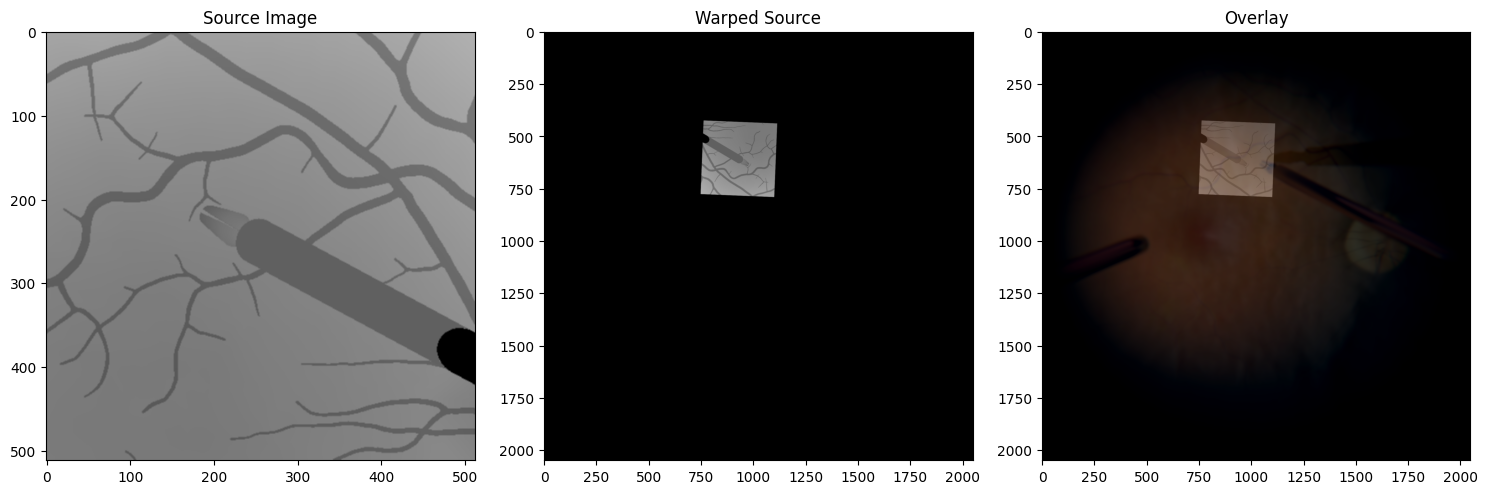

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def overlay_homography(src_img_path, dst_img_path, H, alpha=0.5):
    # Load the images
    src_img = cv2.imread(src_img_path)
    dst_img = cv2.imread(dst_img_path)
    # src_img = cv2.flip(src_img, 0)  # Flip vertically

    # src_img = cv2.resize(src_img, (512, 512), interpolation=cv2.INTER_LINEAR)

    # Warp the source image using the homography matrix
    warped_src = cv2.warpPerspective(src_img, H, (dst_img.shape[1], dst_img.shape[0]))

    # Create a transparent overlay
    overlay = cv2.addWeighted(warped_src, alpha, dst_img, 1 - alpha, 0)

    # Show results side-by-side
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.title("Source Image")
    plt.imshow(cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB))

    plt.subplot(1, 3, 2)
    plt.title("Warped Source")
    plt.imshow(cv2.cvtColor(warped_src, cv2.COLOR_BGR2RGB))

    plt.subplot(1, 3, 3)
    plt.title("Overlay")
    plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))

    plt.tight_layout()
    plt.show()

overlay_homography('./data/OCTsynthetic/test/8_enface.png', './data/OCTsynthetic/test/8_DataCapture.png', H)

In [102]:
H = np.array([
    [1.382812, -0.011719, 883.000000],
    [-0.011719, -1.380859, 873.000000],
    [0.000000, 0.000000, 1.000000]
])

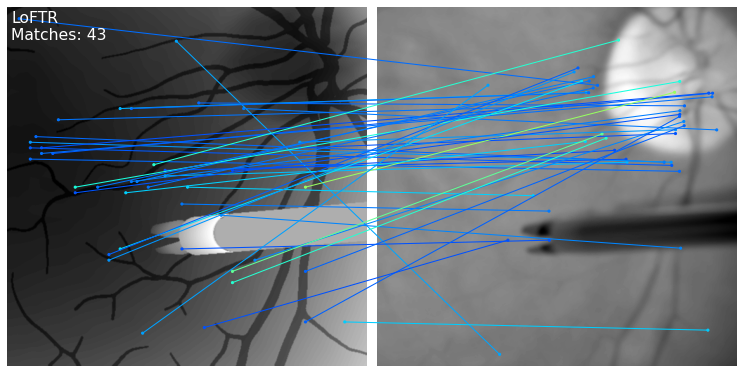

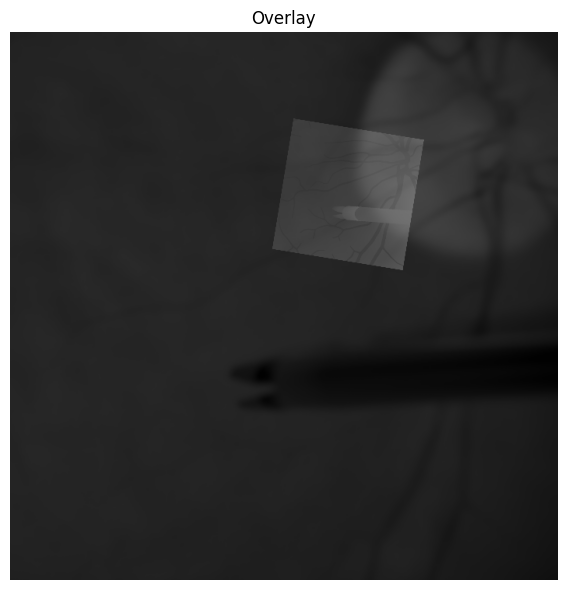

In [ ]:
from src.loftr import LoFTR, default_cfg
import matplotlib.pyplot as plt
import cv2

device = torch.device("cuda" if torch.cuda.is_available() else "cpu" if torch.backends.mps.is_available() else "cpu")

def estimate_rigid_transformation(data_dict, device):  
    kp1, kp2 = batch['mkpts0_f'], batch['mkpts1_f']

    kp1 = kp1.cpu().numpy()
    kp2 = kp2.cpu().numpy()

    foundHomography, mask = cv2.findHomography(kp2, kp1, cv2.RANSAC, 3.0)
    # print(foundHomography)
    data_dict['foundHomography'] = torch.tensor(np.asarray(foundHomography), dtype=torch.float32).to(device)

    # H, mask = cv2.estimateAffine2D(kp2, kp1, None, cv2.RANSAC, 1.0)
    H, mask = cv2.estimateAffinePartial2D(kp1, kp2, None, cv2.RANSAC, 1.0)
    H = np.concatenate([H, np.array([[0, 0, 1]])], axis=0)
    # print(H)
    
    data_dict['pred_H_1to0'] = torch.tensor(np.asarray(H), dtype=torch.float32).to(device)

def overlay_homography(src_img, dst_img, H, alpha=0.5):
    # Load the images
    src_img = src_img.cpu().numpy().squeeze()
    dst_img = dst_img.cpu().numpy().squeeze()
    H = H.cpu().numpy()

    # Warp the source image using the homography matrix
    warped_src = cv2.warpPerspective(src_img, H, (dst_img.shape[1], dst_img.shape[0]))

    # Create a transparent overlay
    overlay = cv2.addWeighted(warped_src, alpha, dst_img, 1 - alpha, 0)

    # Show only the overlay
    plt.figure(figsize=(6, 6))
    plt.title("Overlay")
    plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.tight_layout()
    plt.show()

matcher = LoFTR(config=default_cfg)
# matcher.load_state_dict(torch.load("C:\\Users\\rasul\\Desktop\\LoFTR-master\\logs\\tb_logs\\outdoor-ds-640-bs=3\\version_3\\checkpoints\\last.ckpt")['state_dict'])
matcher.load_state_dict(torch.load("C:\\Users\\rasul\\Desktop\\epoch=399-16-07-2025.ckpt")['state_dict'])
matcher = matcher.eval().cuda()

img0_pth = "C:\\Users\\rasul\\Desktop\\LoFTR-master\\data\\OCTsynthetic\\test_2\\21_enface.png"
img1_pth = "C:\\Users\\rasul\\Desktop\\LoFTR-master\\data\\OCTsynthetic\\test_2\\21_DataCapture_cropped.png"

img0_raw = cv2.imread(img0_pth, cv2.IMREAD_GRAYSCALE)
img1_raw = cv2.imread(img1_pth, cv2.IMREAD_GRAYSCALE)

# img0_raw = cv2.resize(img0_raw, (512, 512), interpolation=cv2.INTER_LINEAR)
# img0_raw = cv2.flip(img0_raw, 0)  # Flip vertically

# img1_raw = cv2.resize(img1_raw, (512, 512), interpolation=cv2.INTER_LINEAR)
# scale_factor = 0.5  # Or 0.25 to reduce 2048 -> 1024 or 512
# img0_raw = cv2.resize(img0_raw, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)
# img1_raw = cv2.resize(img1_raw, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)

img0_raw = cv2.resize(img0_raw, (img0_raw.shape[1]//8*8, img0_raw.shape[0]//8*8))  # input size shuold be divisible by 8
img1_raw = cv2.resize(img1_raw, (img1_raw.shape[1]//8*8, img1_raw.shape[0]//8*8))

img0 = torch.from_numpy(img0_raw)[None][None].cuda() / 255.
img1 = torch.from_numpy(img1_raw)[None][None].cuda() / 255.
batch = {'image0': img0, 'image1': img1}

# Inference with LoFTR and get prediction
with torch.no_grad():
    matcher(batch)
    mkpts0 = batch['mkpts0_f'].cpu().numpy()
    mkpts1 = batch['mkpts1_f'].cpu().numpy()
    mconf = batch['mconf'].cpu().numpy()

# Draw
color = cm.jet(mconf)
text = [
    'LoFTR',
    'Matches: {}'.format(len(mkpts0)),
]
fig = make_matching_figure(img0_raw, img1_raw, mkpts0, mkpts1, color, text=text)

estimate_rigid_transformation(batch, device)

# overlay_homography(batch['image0'], batch['image1'], batch['foundHomography'])
overlay_homography(batch['image0'], batch['image1'], batch['pred_H_1to0'])


In [7]:
import os
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import cm
from src.loftr import LoFTR, default_cfg
from src.utils.plotting import make_matching_figure

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Save matrices with commas
def save_matrix_with_commas(matrix, path):
    with open(path, 'w') as f:
        for row in matrix:
            row_str = ', '.join([f"{val:.6f}" for val in row])
            f.write(row_str + '\n')

def estimate_rigid_transformation(data_dict, device):  
    kp1, kp2 = batch['mkpts0_f'], batch['mkpts1_f']

    kp1 = kp1.cpu().numpy()
    kp2 = kp2.cpu().numpy()

    H, mask = cv2.estimateAffinePartial2D(kp1, kp2, None, cv2.RANSAC, 1.0)
    H = np.concatenate([H, np.array([[0, 0, 1]])], axis=0)
    
    data_dict['pred_H_1to0'] = torch.tensor(np.asarray(H), dtype=torch.float32).to(device)

def overlay_homography(src_img_path, dst_img_path, H, save_path, alpha=0.5):
    # Load the images
    src_img = cv2.imread(src_img_path)
    dst_img = cv2.imread(dst_img_path)

    H = H.cpu().numpy()

    # Warp the source image using the homography matrix
    warped_src = cv2.warpPerspective(src_img, H, (dst_img.shape[1], dst_img.shape[0]))

    # Create a transparent overlay
    overlay = cv2.addWeighted(warped_src, alpha, dst_img, 1 - alpha, 0)

    # Show only the overlay
    plt.figure(figsize=(6, 6))
    plt.title("Overlay")
    plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(save_path)
    # plt.show()

# Set directories
base_path = "C:\\Users\\rasul\\Desktop\\LoFTR-master\\data\\OCTsynthetic\\test"
save_path = "C:\\Users\\rasul\\Desktop\\LoFTR-master\\results_full_7"
os.makedirs(save_path, exist_ok=True)

for i in range(22):
    img0_pth = os.path.join(base_path, f"{i}_enface.png")
    img1_pth = os.path.join(base_path, f"{i}_DataCapture.png")

    if not os.path.exists(img0_pth) or not os.path.exists(img1_pth):
        print(f"Skipping {i} - Missing files")
        continue

    img0_raw = cv2.imread(img0_pth, cv2.IMREAD_GRAYSCALE)
    img1_raw = cv2.imread(img1_pth, cv2.IMREAD_GRAYSCALE)

    img0_raw = cv2.resize(img0_raw, (img0_raw.shape[1]//8*8, img0_raw.shape[0]//8*8))
    img1_raw = cv2.resize(img1_raw, (img1_raw.shape[1]//8*8, img1_raw.shape[0]//8*8))

    img0 = torch.from_numpy(img0_raw)[None][None].to(device) / 255.
    img1 = torch.from_numpy(img1_raw)[None][None].to(device) / 255.

    batch = {'image0': img0, 'image1': img1}

    with torch.no_grad():
        matcher(batch)

    mkpts0 = batch['mkpts0_f'] = batch['mkpts0_f'].cpu()
    mkpts1 = batch['mkpts1_f'] = batch['mkpts1_f'].cpu()
    mconf = batch['mconf'] = batch['mconf'].cpu()

    estimate_rigid_transformation(batch, device)

    np.savetxt(os.path.join(save_path, f"{i}_homography.txt"), batch['pred_H_1to0'].cpu().numpy(), fmt="%.6f")

    save_matrix_with_commas(batch['pred_H_1to0'].cpu().numpy(), os.path.join(save_path, f"{i}_homography.txt"))

    overlay_homography(
        img0_pth,
        img1_pth,
        batch['pred_H_1to0'],
        os.path.join(save_path, f"{i}_overlay_pred_H_1to0.png")
    )

    # === Generate match visualization ===
    color = cm.jet(mconf)
    text = [
        'LoFTR',
        f'Matches: {len(mkpts0)}',
    ]
    fig = make_matching_figure(img0_raw, img1_raw, mkpts0.numpy(), mkpts1.numpy(), color, text=text)

    # Save the figure
    fig.savefig(os.path.join(save_path, f"{i}_loftr_matches.png"))
    plt.close(fig)

    print(f"Processed {i}")

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-h4wtvo23\opencv\modules\calib3d\src\ptsetreg.cpp:174: error: (-215:Assertion failed) count >= 0 && count2 == count in function 'cv::RANSACPointSetRegistrator::run'


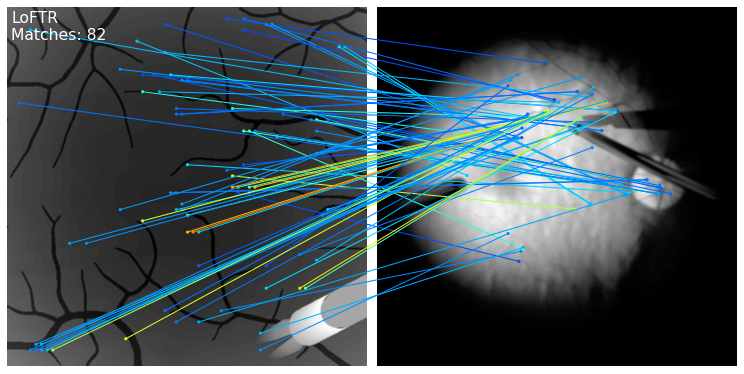

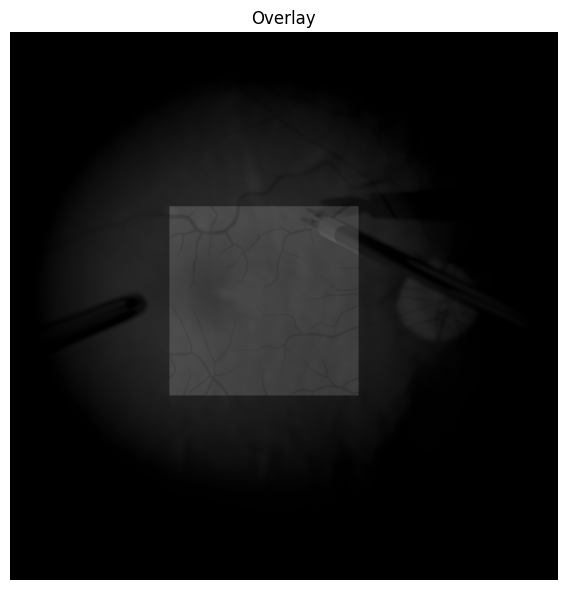

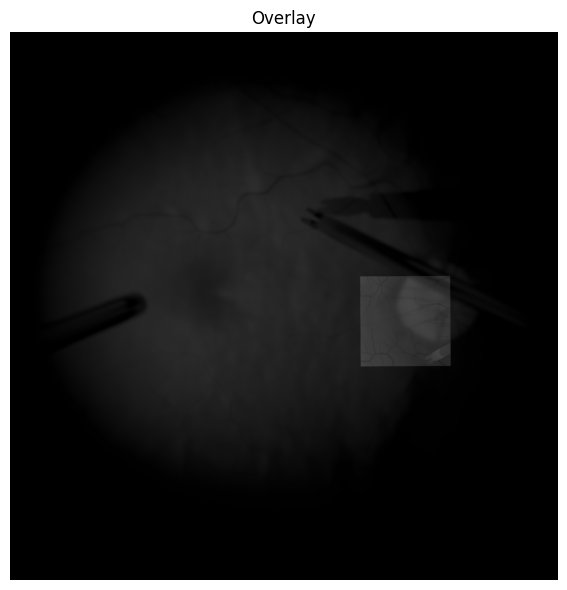

Mean Corner Error: 755.24 pixels


In [8]:
# Code for mean corner error

from src.loftr import LoFTR, default_cfg
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def mean_corner_error(H_pred, H_gt, image_shape):
    H_pred = H_pred.cpu().numpy()

    h, w = image_shape
    corners = np.array([
        [0, 0],
        [w - 1, 0],
        [w - 1, h - 1],
        [0, h - 1]
    ], dtype=np.float32).reshape(-1, 1, 2)

    # Warp corners using both homographies
    warped_gt = cv2.perspectiveTransform(corners, H_gt)
    warped_pred = cv2.perspectiveTransform(corners, H_pred)

    # Compute Euclidean distances and average
    error = np.linalg.norm(warped_gt - warped_pred, axis=2)
    return np.mean(error)


def estimate_rigid_transformation(data_dict, device):  
    kp1, kp2 = batch['mkpts0_f'], batch['mkpts1_f']

    kp1 = kp1.cpu().numpy()
    kp2 = kp2.cpu().numpy()

    H, mask = cv2.estimateAffinePartial2D(kp1, kp2, None, cv2.RANSAC, 1.0)
    H = np.concatenate([H, np.array([[0, 0, 1]])], axis=0)
    
    data_dict['pred_H_1to0'] = torch.tensor(np.asarray(H), dtype=torch.float32).to(device)

def overlay_homography(src_img, dst_img, H, alpha=0.5):
    # Load the images
    src_img = src_img.cpu().numpy().squeeze()
    dst_img = dst_img.cpu().numpy().squeeze()
    H = H.cpu().numpy()

    # Warp the source image using the homography matrix
    warped_src = cv2.warpPerspective(src_img, H, (dst_img.shape[1], dst_img.shape[0]))

    # Create a transparent overlay
    overlay = cv2.addWeighted(warped_src, alpha, dst_img, 1 - alpha, 0)

    # Show only the overlay
    plt.figure(figsize=(6, 6))
    plt.title("Overlay")
    plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def load_homography(path):
    with open(path, 'r') as f:
        lines = f.readlines()
    H = []
    for line in lines:
        row = [float(x) for x in line.strip().split(',')]
        H.append(row)
    return np.array(H, dtype=np.float32)

# Set directories
base_path = "C:\\Users\\rasul\\Desktop\\LoFTR-master\\data\\OCTsynthetic\\test_2"

matcher = LoFTR(config=default_cfg)
# matcher.load_state_dict(torch.load("C:\\Users\\rasul\\Desktop\\LoFTR-master\\logs\\tb_logs\\outdoor-ds-640-bs=3\\version_4\\checkpoints\\enface-to-cropped-fundus-200-epochs.ckpt")['state_dict'])
matcher.load_state_dict(torch.load("C:\\Users\\rasul\\Desktop\\LoFTR-master\\pretrained_models\\5000_epoch_test_augmentation_loftr_weights.ckpt")['state_dict'])
matcher = matcher.eval().cuda()

img0_pth = "C:\\Users\\rasul\\Desktop\\LoFTR-master\\data\\OCTsynthetic\\test\\0_enface.png"
img1_pth = "C:\\Users\\rasul\\Desktop\\LoFTR-master\\data\\OCTsynthetic\\test\\0_DataCapture.png"
homo_path = "C:\\Users\\rasul\\Desktop\\LoFTR-master\\data\\OCTsynthetic\\test\\0_homography.txt"

img0_raw = cv2.imread(img0_pth, cv2.IMREAD_GRAYSCALE)
img1_raw = cv2.imread(img1_pth, cv2.IMREAD_GRAYSCALE)

H = load_homography(homo_path)
# scale_factor = 0.5
# S = np.array([[scale_factor, 0, 0],
#             [0, scale_factor, 0],
#             [0, 0, 1]], dtype=np.float32)
# H = S @ H

# img0_raw = cv2.resize(img0_raw, (512, 512), interpolation=cv2.INTER_LINEAR)
img0_raw = cv2.flip(img0_raw, 0)  # Flip vertically

# img1_raw = cv2.resize(img1_raw, (512, 512), interpolation=cv2.INTER_LINEAR)
# scale_factor = 0.5  # Or 0.25 to reduce 2048 -> 1024 or 512
# img0_raw = cv2.resize(img0_raw, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)
# img1_raw = cv2.resize(img1_raw, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)

img0_raw = cv2.resize(img0_raw, (img0_raw.shape[1]//8*8, img0_raw.shape[0]//8*8))  # input size shuold be divisible by 8
img1_raw = cv2.resize(img1_raw, (img1_raw.shape[1]//8*8, img1_raw.shape[0]//8*8))

H_tensor = torch.from_numpy(H).float()
img0 = torch.from_numpy(img0_raw)[None][None].cuda() / 255.
img1 = torch.from_numpy(img1_raw)[None][None].cuda() / 255.
batch = {'image0': img0, 'image1': img1}

# Inference with LoFTR and get prediction
with torch.no_grad():
    matcher(batch)
    mkpts0 = batch['mkpts0_f'].cpu().numpy()
    mkpts1 = batch['mkpts1_f'].cpu().numpy()
    mconf = batch['mconf'].cpu().numpy()

# Draw
color = cm.jet(mconf)
text = [
    'LoFTR',
    'Matches: {}'.format(len(mkpts0)),
]
fig = make_matching_figure(img0_raw, img1_raw, mkpts0, mkpts1, color, text=text)

estimate_rigid_transformation(batch, device)

overlay_homography(batch['image0'], batch['image1'], H_tensor)
overlay_homography(batch['image0'], batch['image1'], batch['pred_H_1to0'])

# Compute Mean Corner Error

image_shape = img0_raw.shape  # (height, width)
mce = mean_corner_error( batch['pred_H_1to0'], H, image_shape)
print(f"Mean Corner Error: {mce:.2f} pixels")


100%|██████████| 22/22 [00:09<00:00,  2.31it/s]


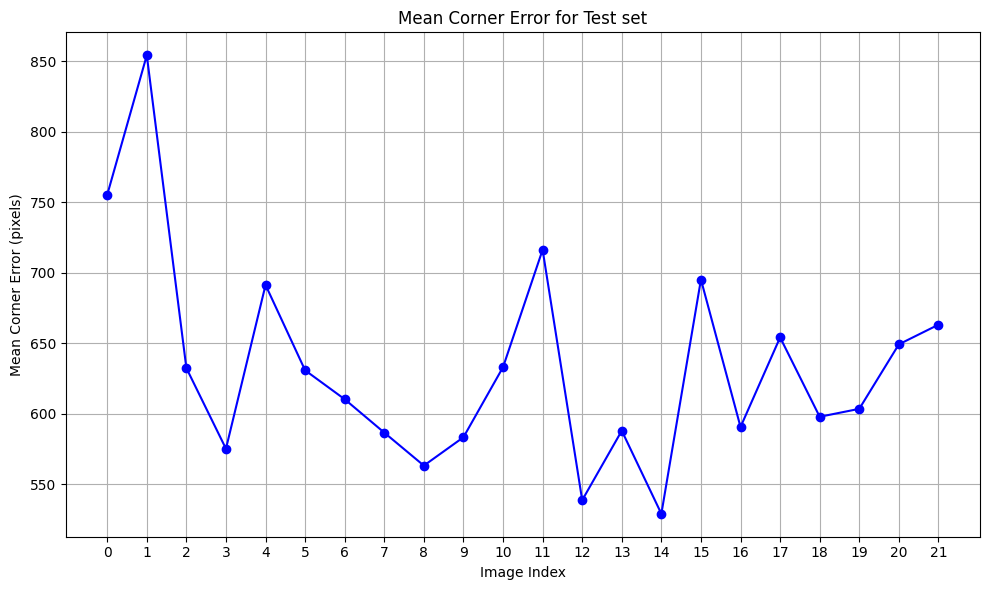

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import cv2
from tqdm import tqdm

# Constants
NUM_IMAGES = 22
img_dir = "C:\\Users\\rasul\\Desktop\\LoFTR-master\\data\\OCTsynthetic\\test"
matcher = LoFTR(config=default_cfg)
matcher.load_state_dict(torch.load("C:\\Users\\rasul\\Desktop\\LoFTR-master\\pretrained_models\\5000_epoch_test_augmentation_loftr_weights.ckpt")['state_dict'])
matcher = matcher.eval().cuda()

errors = []

def mean_corner_error(H_pred, H_gt, image_shape):
    H_pred = H_pred.cpu().numpy()

    h, w = image_shape
    corners = np.array([
        [0, 0],
        [w - 1, 0],
        [w - 1, h - 1],
        [0, h - 1]
    ], dtype=np.float32).reshape(-1, 1, 2)

    # Warp corners using both homographies
    warped_gt = cv2.perspectiveTransform(corners, H_gt)
    warped_pred = cv2.perspectiveTransform(corners, H_pred)

    # Compute Euclidean distances and average
    error = np.linalg.norm(warped_gt - warped_pred, axis=2)
    return np.mean(error)

for idx in tqdm(range(NUM_IMAGES)):
    img0_path = os.path.join(img_dir, f"{idx}_enface.png")
    img1_path = os.path.join(img_dir, f"{idx}_DataCapture.png")
    homography_path = os.path.join(img_dir, f"{idx}_homography.txt")

    img0_raw = cv2.imread(img0_path, cv2.IMREAD_GRAYSCALE)
    img1_raw = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
    H_gt = load_homography(homography_path)

    # Preprocessing
    img0_raw = cv2.flip(img0_raw, 0)
    img0_raw = cv2.resize(img0_raw, (img0_raw.shape[1]//8*8, img0_raw.shape[0]//8*8))
    img1_raw = cv2.resize(img1_raw, (img1_raw.shape[1]//8*8, img1_raw.shape[0]//8*8))

    # Convert to tensors
    img0 = torch.from_numpy(img0_raw)[None][None].cuda() / 255.
    img1 = torch.from_numpy(img1_raw)[None][None].cuda() / 255.
    batch = {'image0': img0, 'image1': img1}

    # Match with LoFTR
    with torch.no_grad():
        matcher(batch)

    # Estimate homography
    estimate_rigid_transformation(batch, device)

    # Compute Mean Corner Error
    # H_pred = batch['pred_H_1to0'].cpu().numpy()
    mce = mean_corner_error(batch['pred_H_1to0'], H_gt, img0_raw.shape)
    errors.append(mce)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(range(NUM_IMAGES), errors, marker='o', linestyle='-', color='blue')
plt.title("Mean Corner Error for Test set")
plt.xlabel("Image Index")
plt.ylabel("Mean Corner Error (pixels)")
plt.grid(True)
plt.xticks(range(NUM_IMAGES))
plt.tight_layout()
plt.show()
